## Hierarchical_Segmentation__O_Clustering_Application

#### This script is used to subject customer data to cluster analysis. First, customer data in CSV format is read through the pandas library and specific columns are selected and assigned to the X variable. Then, k-means clustering is performed for 3 different clusters using KMeans algorithm from sklearn.cluster module and the results are printed. Inertia values for different cluster numbers are calculated and plotted. Then, k-means clustering is performed for 4 clusters and the clustering results are assigned to the variable Y_pred and visualized. For hierarchical clustering, 4 clusters are created using AgglomerativeClustering from the sklearn.cluster module and the results are again assigned to the Y_pred variable and shown in the graph. Finally, a dendrogram of the dataset is drawn using the dendrogram function from the scipy.cluster.hierarchy module. This code is used to analyze customer data, to divide the data into groups and to visualize these groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"

### Read data

In [2]:
data = pd.read_csv("C:\\Users\\Arif Furkan\\OneDrive\\Belgeler\\Python_kullanirken\\musteriler.csv")
X = data.iloc[:,3:].values

### K Means

[[ 65391.54929577   6175.70422535]
 [ 24208.42105263   5267.63157895]
 [111220.58823529   7411.02941176]]


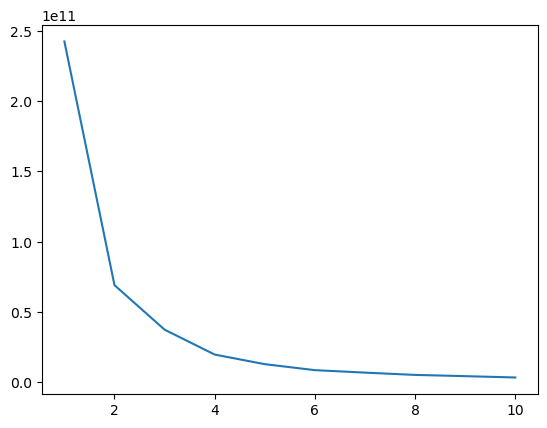

[3 3 3 2 2 2 2 3 2 0 0 3 0 2 3 1 3 2 3 3 2 2 3 0 1 0 2 3 2 0 2 0 0 3 0 0 0
 2 0 1 3 2 3 2 2 0 0 0 0 1 2 3 1 1 3 3 2 3 0 3 1 3 0 2 0 2 0 3 0 2 3 3 3 3
 2 2 1 3 0 2 2 2 0 0 1 3 3 0 2 2 3 2 1 0 2 0 2 3 2 2 0 1 3 2 2 3 3 0 0 1 1
 3 3 3 3 0 2 3 0 0 2 0 3 3 3 0 2 2 1 2 2 0 0 0 0 2 0 0 3 0 3 2 0 0 3 0 2 0
 0 2 0 0 3 2 0 1 2 0 1 2 0 2 2 0 2 0 0 3 2 2 3 2 2 0 0 2 2 0 1 0 0 3 0 1 3
 1 2 2 0 2 0 2 0 3 2 3 3 0 0 0]


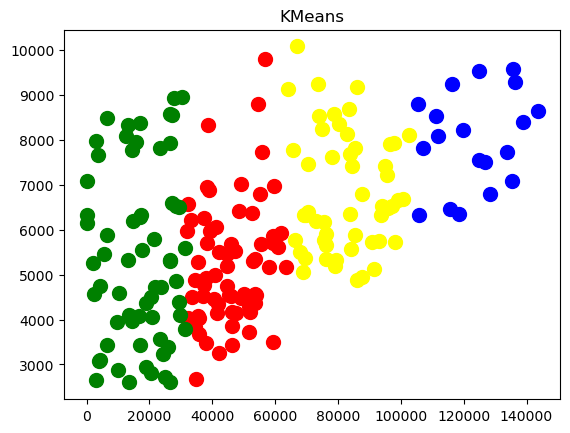

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)
results = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X)
    results.append(kmeans.inertia_)
plt.plot(range(1, 11), results)
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=123)
Y_pred = kmeans.fit_predict(X)
print(Y_pred)

plt.title("KMeans")
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s=100, c='red')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s=100, c='blue')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s=100, c='green')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s=100, c='yellow')
plt.show()

### HC

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


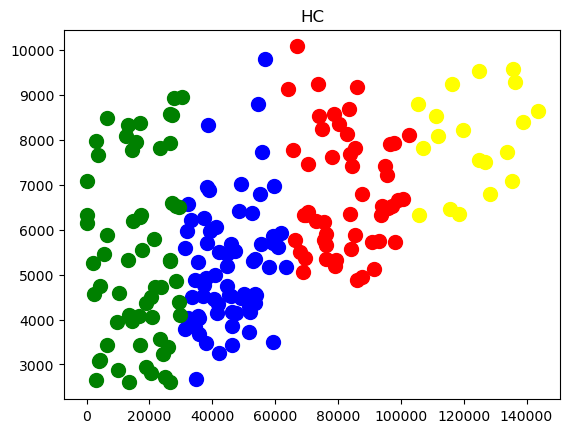

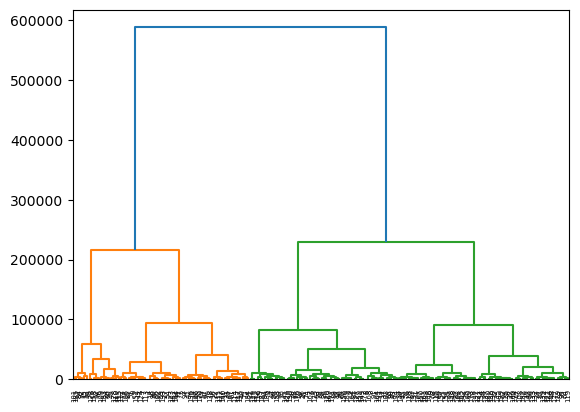

In [4]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, linkage='ward')
Y_pred = ac.fit_predict(X)
print(Y_pred)

plt.title("HC")
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s=100, c='red')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s=100, c='blue')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s=100, c='green')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s=100, c='yellow')
plt.show()

import scipy.cluster.hierarchy as sch
sch.dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()